# Investigating for Correlation Between GDP Per Capita and Net Population Change to Total Population Ratio(NPTPR)

In this notebook, we would be conducting an analysis on correlation between GDP Per Capita and Net Population Change to Total Population Ratio(NPTPR) value from my Human Capital Migration Study datasets.

The NPTPR of a nation is computed with the formula:
* (Number of Immigrants - Number of Emigrants)/Population x 100.
* This value is introduced to better measures net human capital change of a country from migrations in the Human Capital Migration Study dataset.
* A more detailed description of this value can be founded here: /kaggle/input/immigrations-and-emigrations-statistics

In [1]:
## Import the Packages for Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import poisson
from scipy.stats import norm
%matplotlib inline

In [2]:
# Import data
m = pd.read_csv('/kaggle/input/migration/Migration.csv')
mig = pd.DataFrame(m)

In [3]:
mig = mig.rename(columns={'Net Population Change to Total Population Ratio': 'Net Change to Population Ratio'})

In [4]:
mig

,Country,Population,Emigrants Population,Immigrant Population,Net Change to Population Ratio,Net Population Change,Outbound mobility ratio,Emmigrant to Population Ratio,Immigrants to Population Ratio,GDP per capita
0,Andorra,77700,11132,45574,0.44,34442,247.65%,14.33%,58.65%,37207
1,Luxembourg,627704,81757,298062,0.34,216305,170.77%,13.02%,47.48%,53489
2,San Marino,"34,007",2407,5543,0.09,3136,129.37%,7.08%,16.30%,45321
3,Liechtenstein,39584,3706,25877,0.56,22171,127.32%,9.36%,65.37%,165287
4,Turkmenistan,6046292,242554,194920,-0.01,-47634,95.54%,4.01%,3.22%,16581
...,...,...,...,...,...,...,...,...,...,...
196,Grenada,112614,62204,7213,-0.49,-54991,0.00%,55.24%,6.41%,8438
197,Guyana,787215,438413,31169,-0.52,-407244,0.00%,55.69%,3.96%,6863
198,Puerto Rico,2846860,1850529,247132,-0.56,-1603397,0.00%,65.00%,8.68%,33787
199,Saint Kitts and Nevis,47642,50285,7725,-0.89,-42560,0.00%,105.55%,16.21%,18553


In [5]:
x1 = mig['Net Change to Population Ratio']
x = x1*100

In [6]:
y = mig['GDP per capita']

We will first plot the x and y axis values as a scatter plot to visualize the data:

Text(0, 0.5, 'GDP per capita ($)')

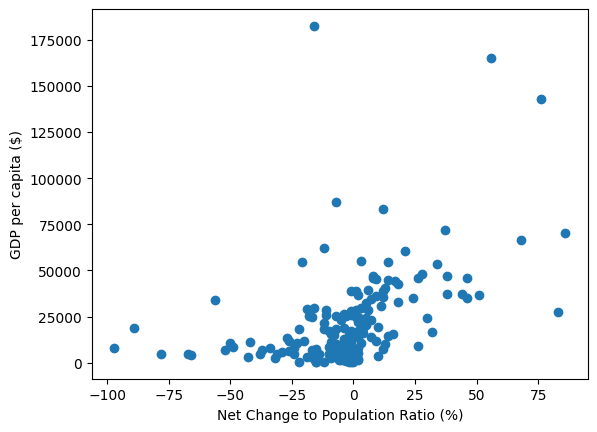

In [7]:
plt.scatter(x,y)
plt.xlabel('Net Change to Population Ratio (%)')
plt.ylabel('GDP per capita ($)')

Then, let's perform a simple linear regression on the two variables: GDP Per Capita and NPTPR.

Intercept: 20642.507748227254 and slope: 455.3034673507912


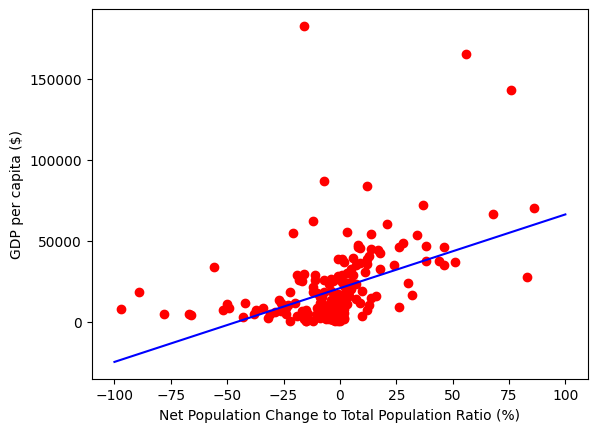

In [8]:
x_mean = np.mean(x)
y_mean = np.mean(y)

S_xy = np.sum((y-y_mean)*(x-x_mean))
S_xx = np.sum((x - x_mean)**2)

Beta_1 = S_xy/S_xx
Beta_0 = y_mean - Beta_1*x_mean

print(f"Intercept: {Beta_0} and slope: {Beta_1}")

x1 = np.linspace(-100,100,100)
#plot result
plt.scatter(x,y,marker="o",color = "red")
plt.plot(x1,Beta_0+Beta_1*x1, color = "blue")
plt.xlabel('Net Population Change to Total Population Ratio (%)')
plt.ylabel('GDP per capita ($)')
plt.show()

Then, we will print the summary table of x and y.

In [9]:
X = sm.add_constant(x)
reg = sm.OLS(y,X).fit()
summary_table=reg.summary()
print(summary_table)

                            OLS Regression Results                            
Dep. Variable:         GDP per capita   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           8.40e-11
Time:                        05:54:24   Log-Likelihood:                -2298.7
No. Observations:                 201   AIC:                             4601.
Df Residuals:                     199   BIC:                             4608.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

From the table above, we can compute the Pearson correlation coefficient r to be: 
r≈ 0.437, indicating moderate correlation correlationship between the 2 data. 

Looking at the p value output from the graph, we can see the p-value (0.000) confirms that this correlation is statistically significant at the α = 0.05 level.

Upon conducting a hypothesis testing with our null hypothesis being there isn't correlation between the two variable, we can conclude that there is indeed correlation between GDP per capita and Net Change to Population Ratio.

## Check Assumption of Linear Regression

Next, let's check the 4 assumption linear regression.

* The average value of the errors are 0.
* The variance of the errors are constant.
* The errors are random samples from the normal distribution of zero mean and variance.
* The errors are independent.


**Check Assumption 1:** Average value of the error ϵ is zero ($\mathbb{E}$ ϵ = 0).

First, we would be checking whether the model satisfy the assumption that the average value of the error ϵ is zero.

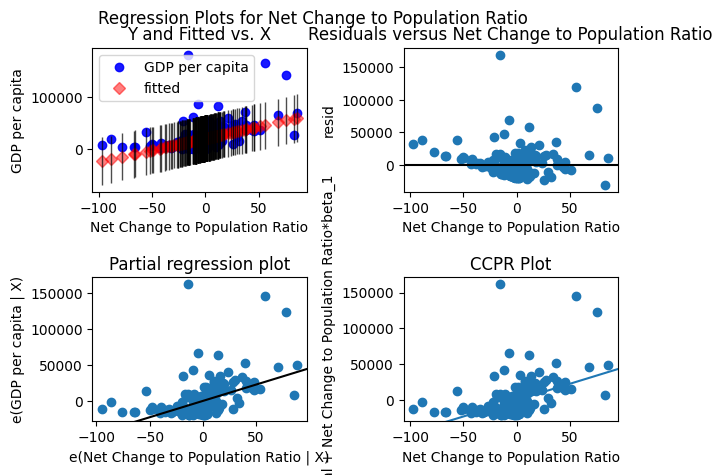

In [10]:
sm.graphics.plot_regress_exog(reg, 'Net Change to Population Ratio')
plt.show()

The plots in the Residuals verse Covarites isn't randomly scattered. Moreover, the datasets in the partial regression plot isn't

**Check Assumption 2:** Variance of Errors is 0 (var(ϵ) = 0)

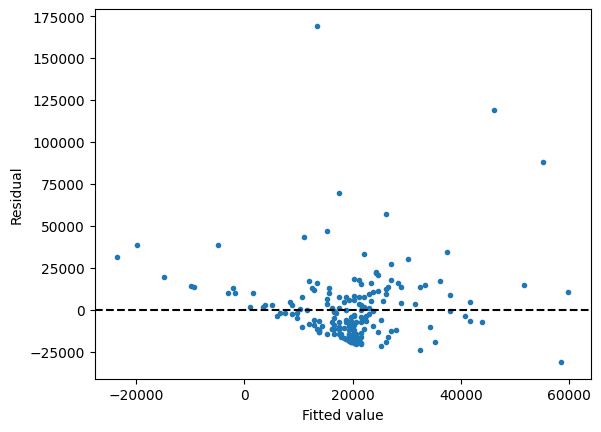

In [11]:
fitted_y = reg.fittedvalues
residuals = reg.resid;
plt.scatter(fitted_y,residuals, marker='.')
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value'); plt.ylabel('Residual')
plt.show()

The plots in the residuals vs fitted value graph isn't randomly scattered and has a clear fanning characteristics. This violates the assumption that variance of the errors equal to 0.

**Check Assumption 3**: Errors are normally distributed.

<Figure size 200x200 with 0 Axes>

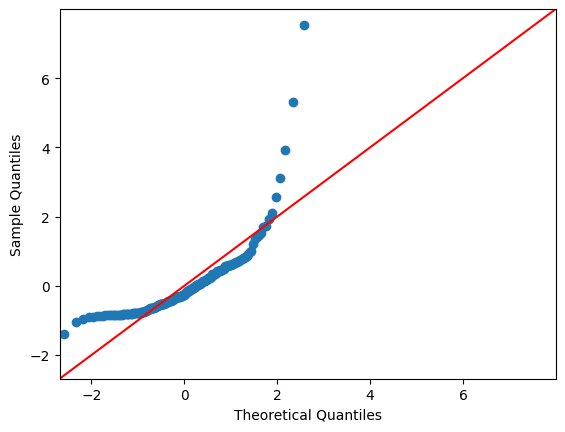

In [12]:
#residuals = reg.resid
plt.figure(figsize=(2, 2)); sm.qqplot(residuals,fit=True, line="45"); plt.show()

The QQ plot of the transformed model displays a clear parabolic characteristics. This is also a violations to our assumptions of linear relationship.

## Conclusion

From the results of our hypothesis testing and checking for assumption in linear regression, we can conclude that there is indeed some correlation between the two variables GDP Per Capita and NPTPR. Nevertheless, this correlation isn't a linear correlation. 

For future improvement, we could add quadratic terms into the equations to create a more fitting model for describing the correlation between GDP Per Capita and NPTPR.

